# Dangerous Rallies
Thesis: After short-term (24hr span) rallies for BTC/ETH (+~5%), alts spike dangerously

In [1]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
import time
from datetime import datetime, timedelta
client = bh.new_binance_client()
importlib.reload(m)
from downloader import Downloader
dl = Downloader()

In [2]:
btc = dl.get_timeseries_data("BTCUSDT")

In [19]:
trades = pd.read_csv("data/trades.csv", index_col=0, parse_dates=True)
trades = trades.iloc[-5000:]

In [20]:
trades2 = pd.read_csv("data/tradesr.csv", index_col=0, parse_dates=True)
trades2 = trades2.iloc[-5000:]

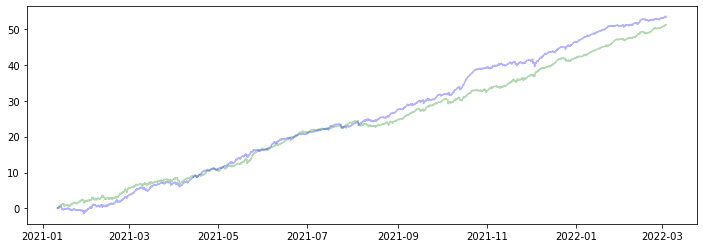

In [21]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(trades.target.cumsum(), alpha=0.3, color="green")
ax.plot(trades2.target.cumsum(), alpha=0.3, color="blue")


In [22]:
t = pd.concat([trades, trades2]).sort_index(axis=0)

<AxesSubplot:xlabel='timestamp'>

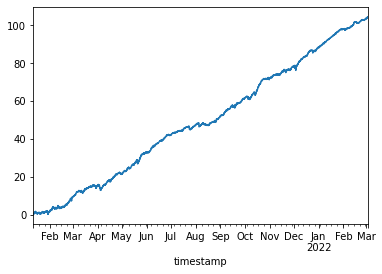

In [23]:
t.target.cumsum().plot()

In [36]:
t = t[t.target<-0.10]

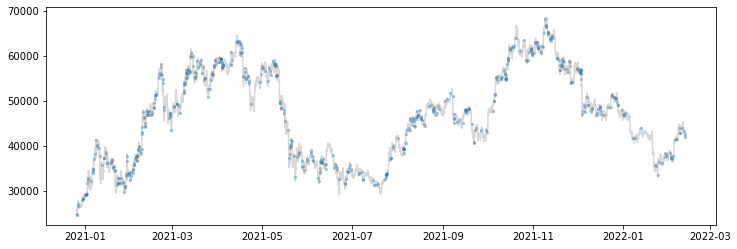

In [37]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(btc.loc[t.index[0]:t.index[-1]].close, alpha=0.3, color="gray")
ax.scatter(t.index, btc.reindex(t.index).close, s=5, alpha=0.3)

## Only trade if positive

In [199]:
t['prev'] = t.target.shift(2)
t['prev1'] = t.target.shift(3)
t['prev2'] = t.target.shift(4)

In [265]:
t['pret1'] = t.pret.shift(2)
t['pret2'] = t.pret.shift(3)

In [489]:
p = t.pret
t['pret10'] = (p.shift(2)+p.shift(3)+p.shift(4)+p.shift(5)+p.shift(6)+p.shift(7)+p.shift(8)+p.shift(9))/8
t['pret10'] = (p.shift(2)+p.shift(3))/2
# t['pret10'] = (p.shift(2)+p.shift(3)+p.shift(4)+p.shift(5)+p.shift(6)+p.shift(7)+p.shift(8)+p.shift(9)+p.shift(10)+p.shift(11))/10




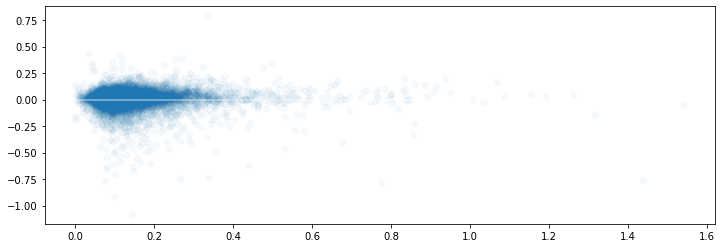

In [490]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(t['pret10'], t['target'], alpha=0.03)
# ax.set_xscale('log')
ax.axhline(0, c="white", alpha=0.5)

In [72]:
# t_ = t.loc[(t.pret<0.15) & (t.pret10<0.15)]
# t_ = t.loc[(t.pret>t.pret1) & (t.pret>0.1)]
t_ = t.loc[(t.pret>0.1)]

In [73]:
t_.iloc[-10:]

,trades,pret,target
timestamp,,,
2022-03-02 21:00:00,oxt,0.113789,0.071443
2022-03-02 23:00:00,bico,0.107782,0.015406
2022-03-03 02:00:00,lsk,0.111469,-0.004023
2022-03-03 05:00:00,twt,0.112426,0.012474
2022-03-03 06:00:00,torn,0.133247,0.042217
2022-03-03 10:00:00,pha,0.115965,0.081825
2022-03-03 12:00:00,glmr,0.114719,0.001382
2022-03-03 13:00:00,uma,0.201127,-0.032086
2022-03-03 14:00:00,uma,0.221577,0.071378


<AxesSubplot:xlabel='timestamp'>

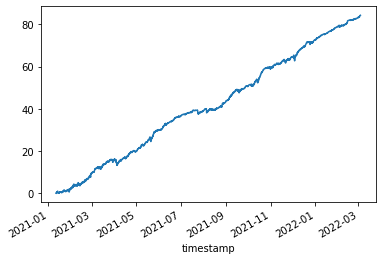

In [74]:
t_.target.cumsum().plot()

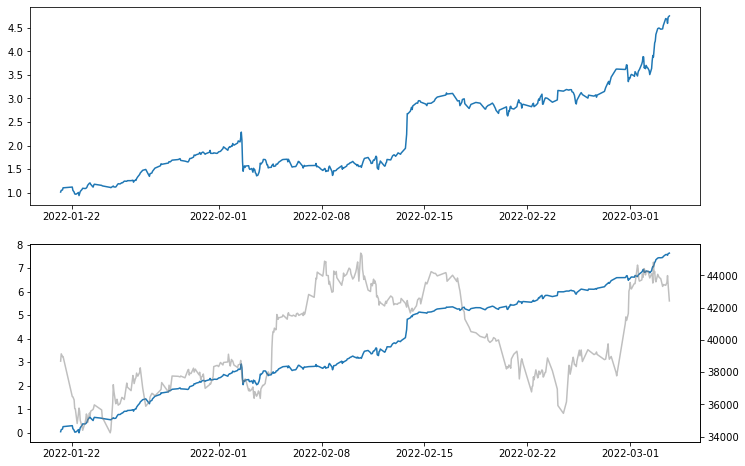

In [76]:
p = t_.loc[t.iloc[-1000].name:]
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].plot(((p.target)/2.2-0.004+1).cumprod())
# ax[0].set_yscale('log')

ax[1].plot(((p.target)).cumsum())
ax1 = ax[1].twinx()
ax1.plot(btc.reindex(p.index).close, c="gray", alpha=0.5)


In [70]:
(t_.index - t_.shift(1).index)[0]

Timedelta('0 days 00:00:00')

In [87]:
times = (t_.reset_index().timestamp - t_.reset_index().shift(1).timestamp)

In [90]:
times = times[1:]

In [ ]:
times[-20:]

5925   0 days 01:00:00
5926   0 days 09:00:00
5927   0 days 01:00:00
5928   0 days 01:00:00
5929   0 days 04:00:00
5930   0 days 02:00:00
5931   0 days 01:00:00
5932   0 days 01:00:00
5933   0 days 06:00:00
5934   0 days 02:00:00
5935   0 days 01:00:00
5936   0 days 01:00:00
5937   0 days 02:00:00
5938   0 days 01:00:00
5939   0 days 08:00:00
5940   0 days 02:00:00
5941   0 days 01:00:00
5942   0 days 06:00:00
5943   0 days 05:00:00
5944   0 days 02:00:00
Name: timestamp, dtype: timedelta64[ns]

In [576]:
print(f"mean: {round(100*t.target.mean(), 2)}%, median: {round(100*t.target.median(), 2)}%, winrate: {round(100*len(t[t.target>0].target)/len(t), 2)}%")
print(f"mean: {round(100*t_.target.mean(), 2)}%, median: {round(100*t_.target.median(), 2)}%, winrate: {round(100*len(t_[t_.target>0].target)/len(t_), 2)}%, length: {len(t_)}")

mean: 1.06%, median: 1.87%, winrate: 65.57%
mean: 1.43%, median: 2.59%, winrate: 67.32%, length: 5945


<AxesSubplot:xlabel='timestamp'>

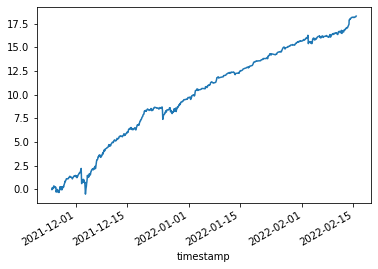

In [582]:
t_.loc[t.iloc[8000].name:].target.cumsum().plot()

In [557]:
len(t_.loc[t.iloc[9000].name:].target.cumsum())

376

In [223]:
green = pd.read_csv("data/green.csv", index_col=0, parse_dates=True)

In [243]:
# trades = pd.concat([trades, green], axis=1).dropna()
trades['green'] = green.green/green.total

In [246]:
trades['greensft'] = trades['green']-trades['green'].shift(1)

In [239]:
def get_gain(btc, shift):
    return (btc.close - btc.close.shift(shift))/btc.close.shift(shift)

In [240]:
trades['btc'] = get_gain(btc, 2)

In [205]:
trades['prev'] = trades['result'].shift(1)

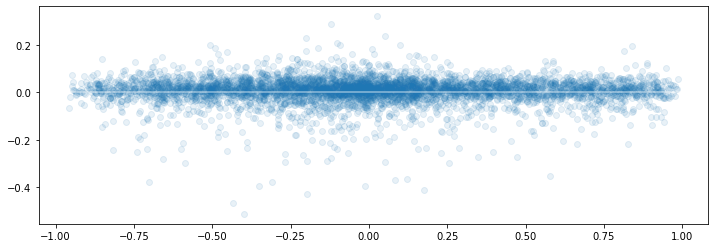

In [247]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(trades['greensft'], trades['result'], alpha=0.1)
# ax.set_xscale('log')
ax.axhline(0, c="white", alpha=0.5)

In [295]:
# t = trades[(trades['btc']<0.001) & (trades['btc']>-0.001)]
# t = trades[(trades['btc']>0.1) | (trades['btc']<-0.1)]
t = trades[trades['greensft']>0.9]

len(t)

74

In [318]:
trades[trades['result']<-0.05]

,trades,pret,target,result,green,total,btc,greensft
timestamp,,,,,,,,
2020-12-26 06:00:00,mith,0.079646,-0.057008,-0.082914,0.232955,176,0.000830,-0.304188
2020-12-27 00:00:00,mith,0.091428,-0.251531,-0.086944,0.244318,176,0.013096,-0.323864
2020-12-27 12:00:00,mith,0.091116,-0.138984,-0.051863,0.080000,175,-0.022165,-0.101818
2020-12-30 04:00:00,mith,0.127315,-0.060010,-0.069050,0.203390,177,-0.003630,-0.412429
2020-12-30 18:00:00,og,0.133953,-0.213567,-0.079320,0.561798,178,0.012683,-0.191011
...,...,...,...,...,...,...,...,...
2022-02-02 16:00:00,idex,0.152479,-0.263199,-0.210708,0.031802,283,-0.009734,-0.390184
2022-02-03 08:00:00,ooki,0.102777,-0.105071,-0.081658,0.725979,281,0.004161,-0.171184
2022-02-03 12:00:00,forth,0.235254,-0.090283,-0.066027,0.801418,282,0.008664,0.730496


In [313]:
hours = list(map(lambda x: x.hour, trades[trades['result']<-0.05].index))

In [314]:
from collections import Counter

In [315]:
hours = Counter(hours)

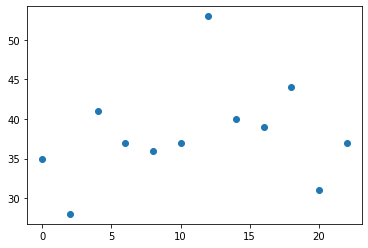

In [316]:
plt.scatter(hours.keys(), hours.values())

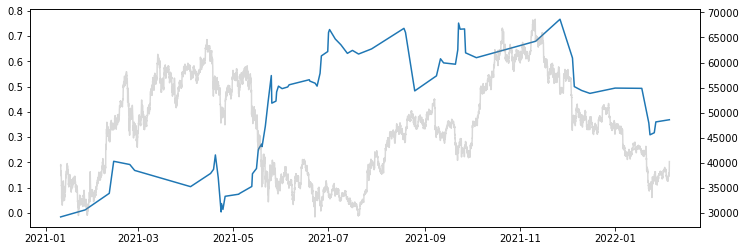

In [296]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t.target.cumsum())
ax1 = ax.twinx()
ax1.plot(btc.loc[t.index[0]:t.index[-1]].close, alpha=0.3, color="gray")

In [297]:
print(f"mean: {round(100*trades.target.mean(), 2)}%, median: {round(100*trades.target.median(), 2)}%, winrate: {round(100*len(trades[trades.target>0].target)/len(trades), 2)}%")


mean: 1.04%, median: 1.83%, winrate: 65.46%


In [298]:
print(f"mean: {round(100*t.target.mean(), 2)}%, median: {round(100*t.target.median(), 2)}%, winrate: {round(100*len(t[t.target>0].target)/len(t), 2)}%, length: {len(t)}")

mean: 0.5%, median: 0.85%, winrate: 58.11%, length: 74


In [9]:
t = trades[-5000:-4000]

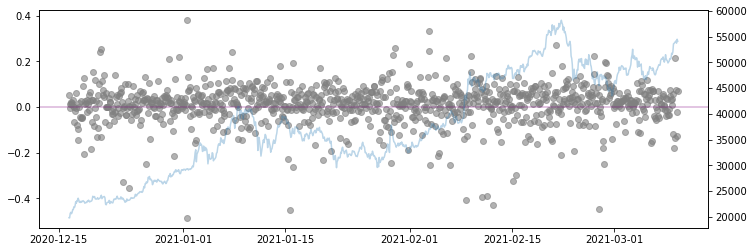

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(t.index, t.target, c="gray", alpha=0.6)
ax1 = ax.twinx()
ax1.plot(t.btc, alpha=0.3)
ax.axhline(0, alpha=0.3, c="purple")